# Setup

In [1]:
from colorama import Fore, Style
import json

# Dataset download

In [3]:
from xami_dataset import XAMIDataset

# Download the dataset
xami_dataset = XAMIDataset(
    repo_id="iulia-elisa/XAMI-dataset", 
    dataset_name="xami_dataset", 
    dest_dir='./data')

xami_dataset.zip:   0%|          | 0.00/50.9M [00:00<?, ?B/s]

Dataset downloaded.
Dataset unzipped.
Train annotations file: ./data/xami_dataset/train/_annotations.coco.json
Valid annotations file: ./data/xami_dataset/valid/_annotations.coco.json


# Dataset info

In [4]:
splits = ['train', 'valid']

for annotations_file in [xami_dataset.train_annotations_path, xami_dataset.valid_annotations_path]:
    data = xami_dataset.get_data_from_json(annotations_file)
    print(len(data['annotations']))
    _, cat_names, _ = xami_dataset.get_categories(data)
    print(annotations_file)
    print(f"{Fore.BLUE}Class categories in: {cat_names}{Style.RESET_ALL}")
    print(f"{Fore.BLUE}Number of annotations: {len(data['annotations'])}{Style.RESET_ALL}")
    print(f"{Fore.BLUE}Number of images in: {len(data['images'])}{Style.RESET_ALL}")

5298
./data/xami_dataset/train/_annotations.coco.json
Class categories in: ['central-ring', 'other', 'read-out-streak', 'smoke-ring', 'star-loop']
Number of annotations: 5298
Number of images in: 791
1723
./data/xami_dataset/valid/_annotations.coco.json
Class categories in: ['central-ring', 'other', 'read-out-streak', 'smoke-ring', 'star-loop']
Number of annotations: 1723
Number of images in: 264


In [5]:
categories_df = xami_dataset.get_category_table()
display(categories_df) 

Split,#Train (%),#Valid (%)
Category,,
central-ring,500.0 (9.438%),168.0 (9.75%)
other,32.0 (0.604%),9.0 (0.522%)
read-out-streak,2122.0 (40.053%),677.0 (39.292%)
smoke-ring,1267.0 (23.915%),402.0 (23.331%)
star-loop,1377.0 (25.991%),467.0 (27.104%)


We can also see how many images per filter we have.

In [6]:
filters_count = {'U': 0, 'V': 0, 'B': 0, 'W': 0, 'S': 0, 'M': 0, 'L': 0}
filters_df = xami_dataset.get_filters_table(filters_count)
display(filters_df)

,Observing Filter,Image Count,Annotation Count
0,U,193,1837
1,V,102,880
2,B,116,1259
3,W,3,11
4,S,63,226
5,M,175,681
6,L,403,2127


## Mask heatmap

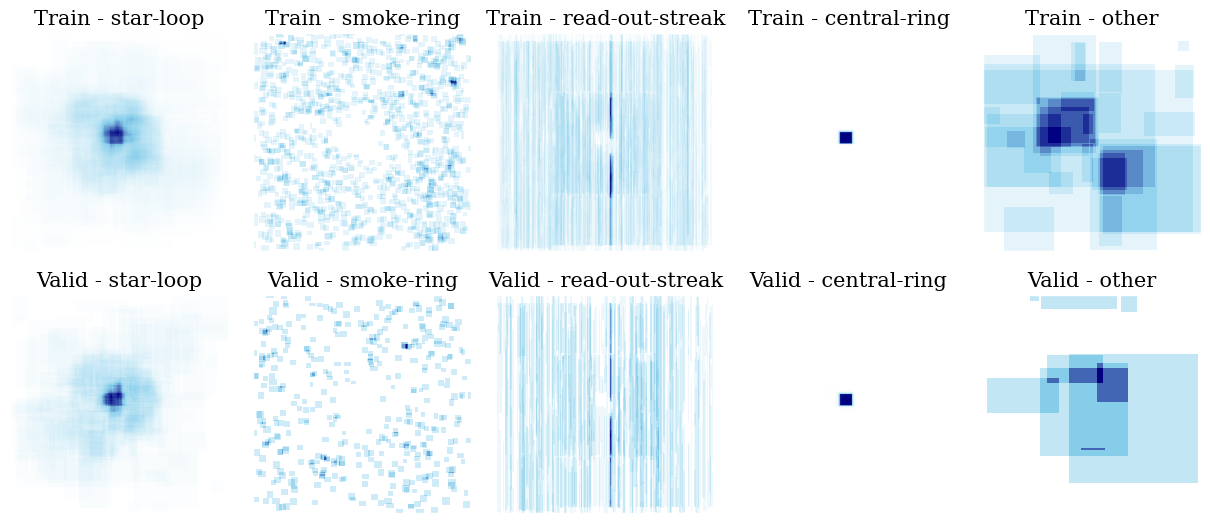

In [7]:
xami_dataset.generate_heatmap(output_path='./plots/artefact_distributions.png')

## Galactic coordinates plotting

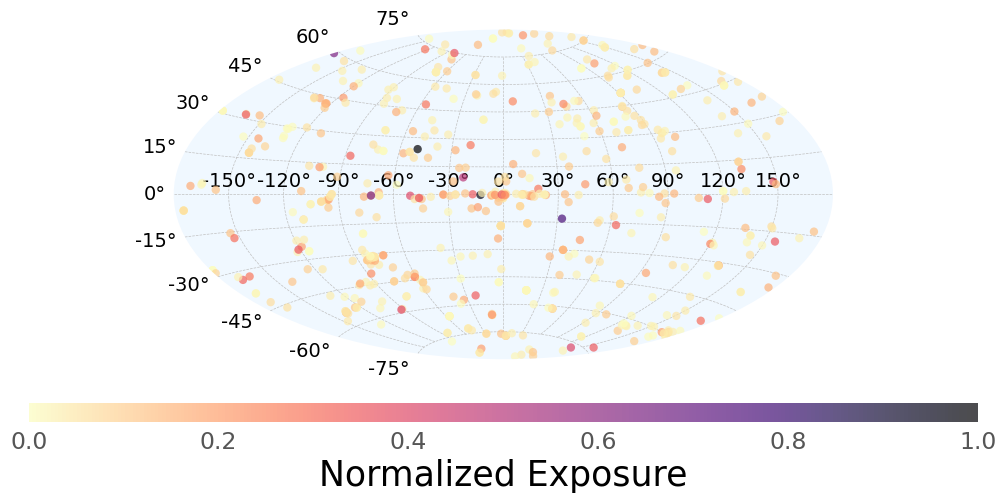

In [8]:
xami_dataset.generate_galactic_distribution_plot(
    splits=['train', 'valid'], 
    obs_coords_file='./xami_utils/obs_info_1024_all.json', 
    output_path='dataset_galactic_distribution.png')

# (Optional) Split the dataset using the multi-Stratified K-fold CSV files

The CSV files have been previously generated using the multilabel Stratified K-Fold (**mskf**) technique in order to balance classes distributions across dataset splits. If you wish to generate different versions of dataset splits (e.g. with different *k*, different algorithm, etc...), you can do that in the `stratified_kfold.ipynb` notebook. We have provided these splits to make them a baseline as they are used for our metrics. 

Each CSV file has the following columns:

- `IMADE_ID` - an integer representing the image ID from the original json annottaions file
- `IMAGE_PATH` - the corresponding image path
- `SPLIT` - either **train** or **valid**

In [ ]:
use_skf_splits = False

In [ ]:
if use_skf_splits:
    import pandas as pd
    from xami_utils import utils
    
    if use_skf_splits: # Whether to use the 4 split folds.
        csv_files = ['mskf_0.csv', 'mskf_1.csv', 'mskf_2.csv', 'mskf_3.csv'] 
        
        for idx, csv_file in enumerate(csv_files):
            mskf = pd.read_csv(csv_file)
            utils.create_directories_and_copy_files('path/to/dest', data_in, mskf, idx)